# Detecção *Online* de Eventos em Séries Temporais: Rumo a um simulador de monitoramento e detecção adaptativa de eventos em séries temporais

## Loading Libraries

In [1]:
#R Libraries
library(daltoolbox)
library(dalevents)
library(harbinger)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform




In [3]:
#Python DeoST implementation
reticulate::source_python("https://raw.githubusercontent.com/janiosl/python.ds/refs/heads/master/py_poo/pr_work/deost_ad.py")

In [4]:
#Unused model - Creating just to activate Harbinger evaluation and plot funcions
model <- hanr_fbiad()

## Loading Data

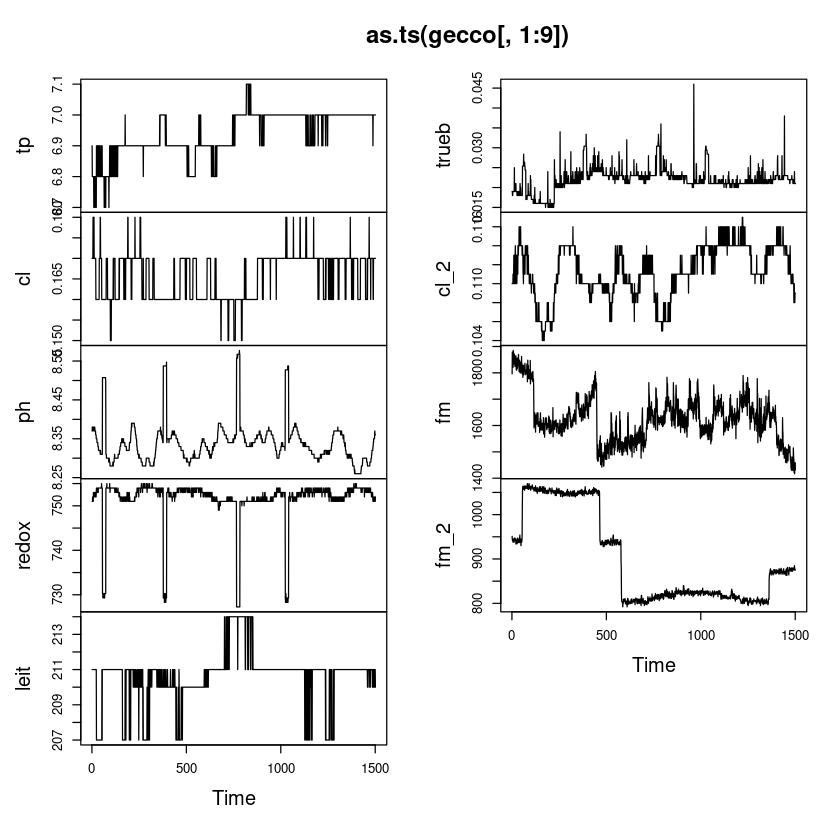

In [5]:
#Dataset
data("gecco")
gecco <- gecco$gecco[16500:18000,]
plot(as.ts(gecco[,1:9]))

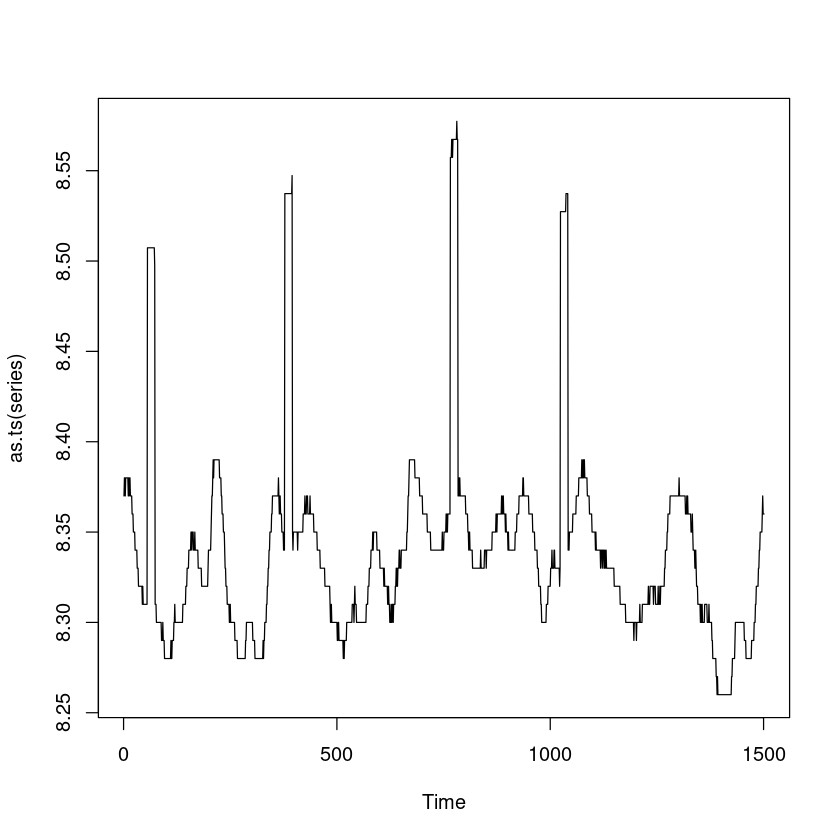

In [6]:
#Select variable to univariate analysis
series <- gecco$ph
reference <- gecco$event

plot(as.ts(series))

In [7]:
#Create DeoST object with series
ph <- GeraTS(serie=series)

## Create DeoST detector

In [8]:
#Model
deost <- Evento(s=ph)

In [9]:
#Detection
ev_idx <- deost$detect()[[1]]
print(deost)

Series with 1501 observations.
Parameters: mu=8.339039404360461, sigma=0.053625004148212294
Threshold: (8.41947691058278, 8.258601898138142)
Detection based on IQR - Events detected: 72


In [10]:
#Result organization as harbinger output
create_harb_res <- function(ev_idx, n){
  result <- data.frame(idx = 1:n)
  result$event <- 0
  result$event[ev_idx] <- 1
  result$type <- ""
  result$type[ev_idx] <- "anomaly"
  return (result)
}

In [11]:
#Adjust index from Python pattern to R pattern (start from 1 instead of from 0)
ev_idx <- ev_idx+1
n = length(series)

In [12]:
result <- create_harb_res(ev_idx, n)

In [13]:
#Evaluate
evaluation <- evaluate(model,
                       result$event,
                       reference)

evaluation$confMatrix

          event      
detection TRUE  FALSE
TRUE      72    0    
FALSE     0     1429 

In [14]:
evaluation$accuracy
evaluation$F1

[1] 1

[1] 1

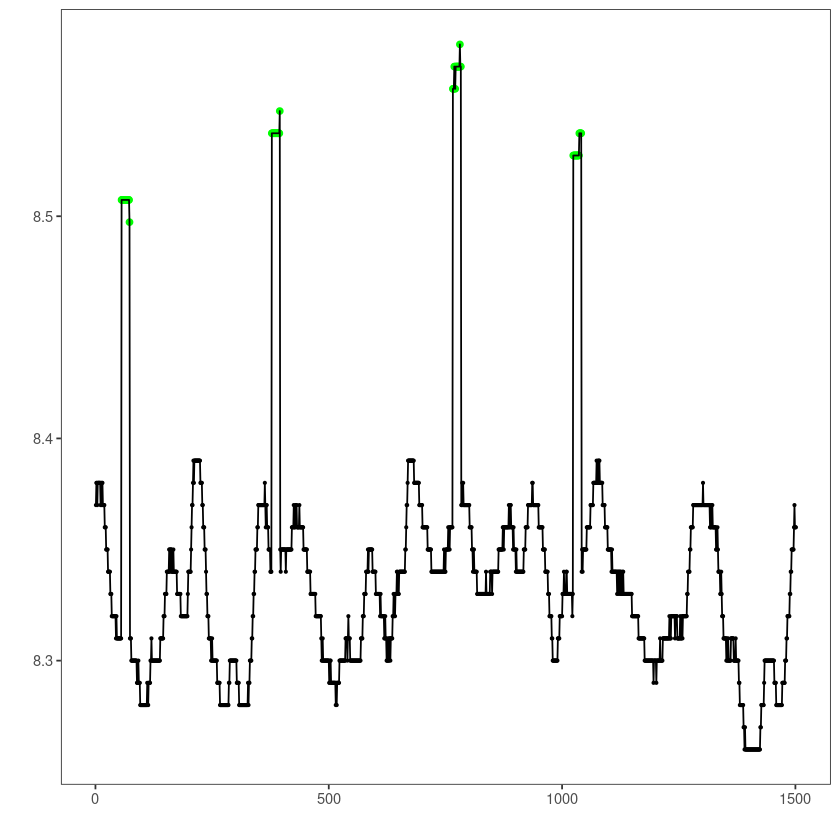

In [15]:
#Visual analysis
grf <- har_plot(model,
                series,
                result,
                reference)

plot(grf)